In [1]:
import librosa as lib
import IPython.display as ipd
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift, FrequencyMask
import matplotlib.pyplot as plt

sr=48000

In [2]:
s = np.load('/home/cybercore/oldhome/datasets/rain_forest/data_waveform/species/0099c367b_17_4_51.4206_55.1996_1464.26_4565.04.npy')
# s2 = np.load('3.npy')
# s3 = np.load('3.npy')

In [3]:
def normalize(sound):
    max_ = sound.max()
    min_ = sound.min()
    n_sound = (sound - min_) / (max_ - min_)

    return n_sound

In [10]:
def plot_spec(y, y2):
    spec = lib.feature.melspectrogram(y, sr=sr)
    spec = lib.power_to_db(spec)
    
    spec2 = lib.feature.melspectrogram(y2, sr=sr)
    spec2 = lib.power_to_db(spec2)
    
    fig = plt.figure(figsize=(20,10))

    fig.add_subplot(1, 2, 1)
    plt.imshow(normalize(spec))

    fig.add_subplot(1, 2, 2)
    plt.imshow(normalize(spec2))

    plt.show()

In [4]:
ipd.Audio(s2, rate=22050)


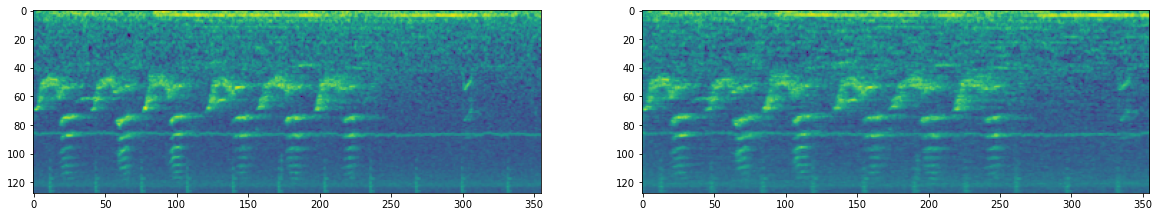

In [31]:
aug = AddGaussianNoise(min_amplitude=0.005, max_amplitude=0.005, p=1)
aug = TimeStretch(min_rate=0.8, max_rate=1, p=1)
# aug = PitchShift(min_semitones=-3, max_semitones=-3, p=1)
# aug = Shift(min_fraction=-0.25, max_fraction=-0.25, p=1)
# aug = FrequencyMask(min_frequency_band=0.5, max_frequency_band=0.5, p=1)
s_aug = aug(s, sr)

plot_spec(s, s_aug)